# Word Cloud Practice

Guan Pin Chen

2021/11/18

## Import the Packages

In [1]:
import pandas, numpy
import jieba
from collections import Counter
from PIL import Image
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator

## Read Data
Read the text file and specific words file for word cloud.<br>
The text file is an introduction regarding my experience in data analysis.

In [2]:
text = open('C:/Users/acer/workspace/practice/wordcloud/text1.txt', 'r', encoding='utf-8').read()
jieba.load_userdict('C:/Users/acer/workspace/practice/wordcloud/words.txt')

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\acer\AppData\Local\Temp\jieba.cache
Loading model cost 3.902 seconds.
Prefix dict has been built succesfully.


## Cut and Count the Words

In [4]:
seg_list = jieba.lcut(text, cut_all=False)
dictionary = Counter(seg_list)
print(dictionary)
#len(dictionary)

Counter({' ': 66, '，': 38, '\n': 17, '統計': 16, '是': 15, '在': 12, '也': 12, '相關': 10, '我': 9, '。': 9, '數據分析': 8, '有': 8, '、': 8, 'R語言': 8, '理論': 7, '這': 7, 'Python': 7, '機器學習': 7, '都': 6, '個': 6, '工具': 6, 'Google': 6, '建模': 6, '一': 5, ',': 5, '臺灣': 4, '屏東': 4, '跟': 4, '像': 4, '資料分析': 4, '當中': 4, '進行': 4, '因此': 4, '去': 4, '更': 4, '學習': 4, '成功大學': 3, '大學': 3, '因為': 3, '了解': 3, '大': 3, '主要': 3, '堂課': 3, '讓': 3, '上': 3, '中': 3, '一些': 3, '方法': 3, '使用': 3, '自學': 3, '能力': 3, '持續': 3, '能': 3, '推導': 3, '台南': 3, '畢業': 2, '時期': 2, '所學': 2, '而': 2, '大三': 2, '次': 2, '完整': 2, '應用': 2, '分析': 2, '資料': 2, '需要': 2, '除了': 2, '實作': 2, '之外': 2, '我們': 2, '醫學': 2, '知識': 2, '之後': 2, '教授': 2, '計畫': 2, '研究': 2, '新': 2, '生物資訊': 2, '很多': 2, '論文': 2, 'Linux': 2, '累積': 2, '一點': 2, '的': 2, '線上課程': 2, '常見': 2, '叫': 1, '陳冠頻': 1, '來自': 1, '於': 1, '臺南': 1, '學系': 1, '主修': 1, '科系': 1, '對於': 1, '比較': 1, '深入': 1, '大一': 1, '二時': 1, '東西': 1, '以': 1, '數學': 1, '為主': 1, '數理': 1, '微積分': 1, '線性': 1, '代數': 1, '大四': 1, '開始': 1, '漸漸': 

## Set Stop Words
Choose the unnecessary words in the text file as stop words. Therefore, these words would not appear in the wordcloud image.

In [5]:
stopword = [' ', '，', '。', '、', '/n', '是', '也', '在']
[dictionary.pop(x, None) for x in stopword]

[66, 38, 9, 8, None, 15, 12, 12]

## Create the Word Cloud
First, setting the path of the path for the type of words. Then, read the picture for the shape of word cloud. The final step is to set the parameters about word cloud and print it.

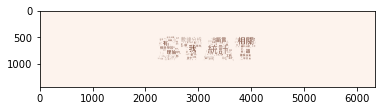

In [8]:
font_path = 'C:/Users/acer/workspace/practice/jf-openhuninn-1.1/jf-openhuninn-1.1/jf-openhuninn-1.1.ttf'
mask_color = numpy.array(Image.open('C:/Users/acer/workspace/practice/wordcloud/picture.png'))
mask_color = mask_color[::3, ::3]
mask_image = mask_color.copy()
mask_image[mask_image.sum(axis=2) == 0] = 255 

wc = wordcloud.WordCloud(background_color='#FDF3ED',
                         margin=2,
                         mask=mask_image, 
                         font_path=font_path,
                         max_words=245, 
                         width=211200, height=48000,
                         relative_scaling=0.5, 
                         max_font_size=80,
                         min_font_size=1,
                         scale=5 
                         )

wc.generate_from_frequencies(dictionary) 

image_colors = ImageColorGenerator(mask_color)
wc.recolor(color_func=image_colors)

plt.imshow(wc)

## Save the Image

In [10]:
wc.to_file('C:/Users/acer/workspace/practice/wordcloud/my_wordcloud.jpg')

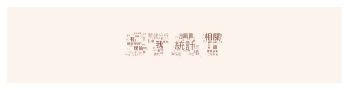

In [9]:
plt.imshow(wc)
plt.axis("off")
plt.savefig("C:/Users/acer/workspace/practice/wordcloud/my_wordcloud1.png",dpi=1000)